# 3 Features Construction

## 3.3 Rolling Returns

#### Imports and Loads Needed

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload 

plot_args = {"figsize": (21,9),            
            "legend": True}

In [18]:
## Custom Made Module
from modules import performance_measures_helper as pms
reload(pms)

<module 'modules.performance_measures_helper' from '/home/hcf/source/Python/pystock_recommender/jupyter_notebooks/modules/performance_measures_helper.py'>

In [4]:
daily_rets = (
    pd.read_csv("./data/config/20220814_daily_raw_returns_merged.csv", 
    header=0, na_values="#N/A", index_col="Date", parse_dates=True)
)

#### Checks and Preparation

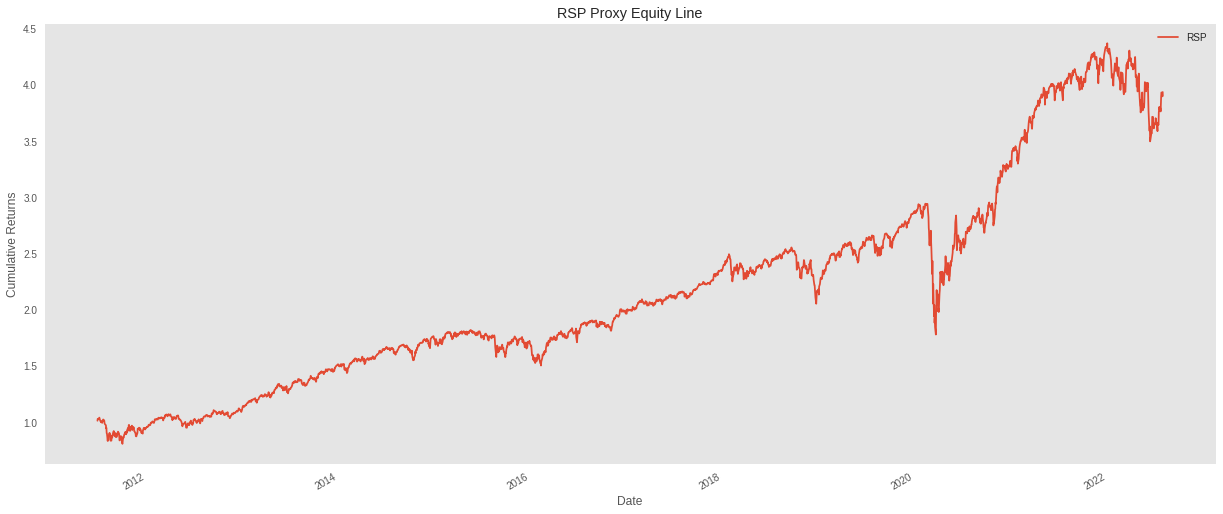

In [306]:
rsp_proxy_daily_rets = daily_rets.mean(axis=1, skipna=True)

plt.style.use("ggplot")
(1+pms.net_cumreturn(rsp_proxy_daily_rets)).rename("RSP").plot(**plot_args)
plt.grid()
plt.title("RSP Proxy Equity Line")
plt.ylabel("Cumulative Returns");

In [6]:
START_TRAINING_DATE_CUT="2012-06-29"
END_TRAINING_DATE_CUT="2022-07-29"

In [20]:
daily_cumrets = pms.net_cumreturn(daily_rets)

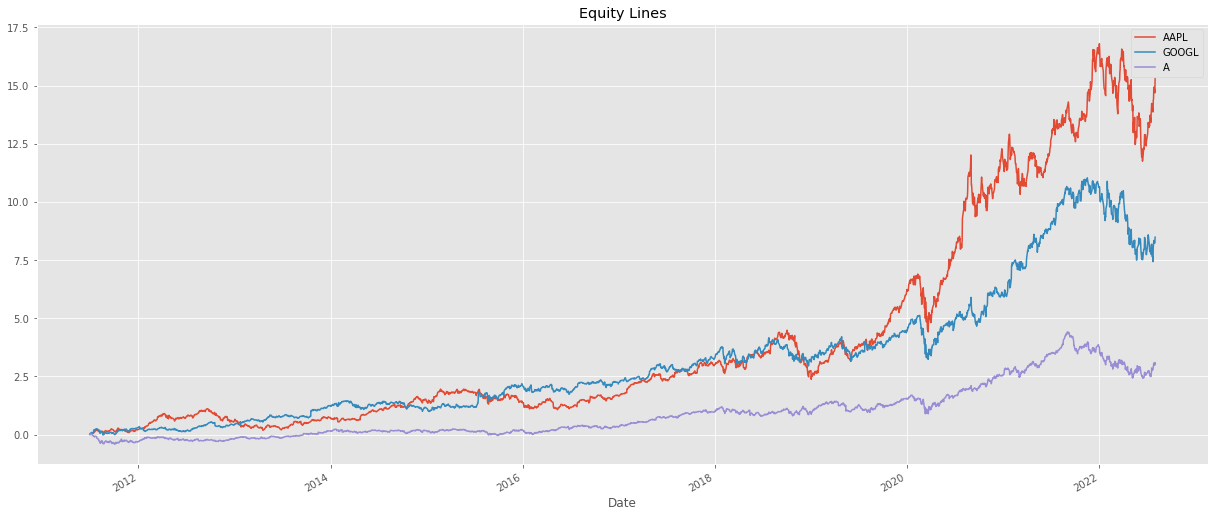

In [21]:
plt.style.use("ggplot")
daily_cumrets[["AAPL", "GOOGL", "A"]].plot(**plot_args, title="Equity Lines");

#### **Rolling Returns** Calculation and Visualizations

Cumulative Returns are normalized (adjusted) prices, so we can discuss rolling returns from now on

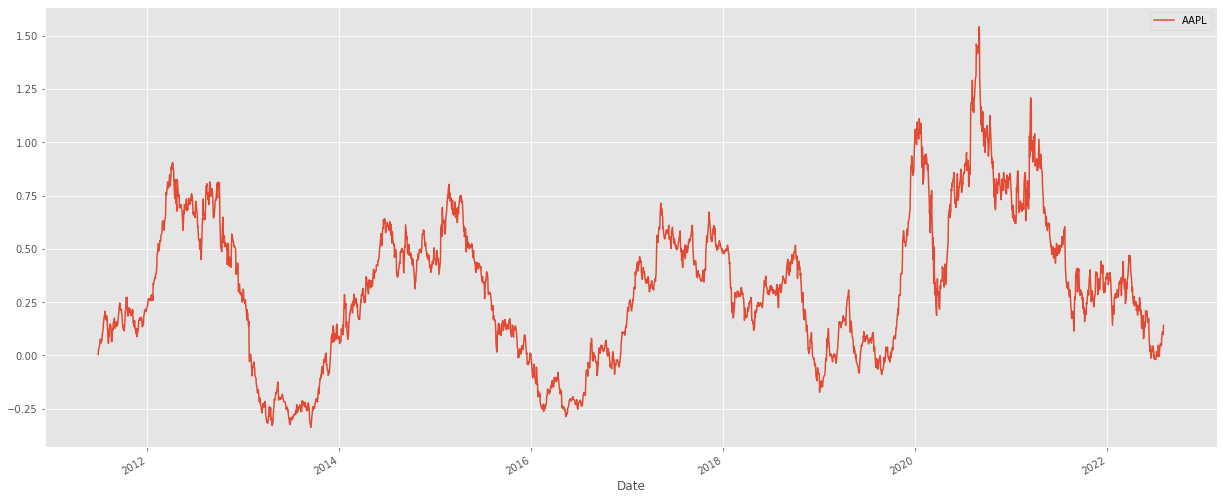

In [81]:
daily_rets[["AAPL"]].rolling(window="360D").apply(pms.multi_period_return).plot(**plot_args);

1. 1-year Rolling Returns

In [24]:
rolling_returns_360D = daily_rets.rolling(window="360D", min_periods=240).apply(pms.multi_period_return)


In [28]:
rolling_returns_360D.dropna(subset=["AAPL"], inplace=True)

In [30]:
rolling_returns_360D.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-12,-0.218048,-0.455348,NaN,NaN,0.724823,NaN,-0.087378,NaN,0.230572,NaN,...,-0.001067,-0.249454,NaN,NaN,0.171766,-0.032085,NaN,-0.248163,NaN,NaN
2012-06-13,-0.227359,-0.457905,NaN,NaN,0.712849,NaN,-0.100944,NaN,0.221634,NaN,...,-0.006153,-0.243505,NaN,NaN,0.159956,-0.040248,NaN,-0.254820,NaN,NaN
2012-06-14,-0.220425,-0.447037,NaN,NaN,0.710963,NaN,-0.088365,NaN,0.234146,NaN,...,0.002948,-0.244496,NaN,NaN,0.188743,-0.029524,NaN,-0.236097,NaN,NaN
2012-06-15,-0.207349,-0.436170,NaN,NaN,0.718746,NaN,-0.080225,NaN,0.241296,NaN,...,0.010978,-0.227641,NaN,NaN,0.199261,0.011613,NaN,-0.221951,NaN,NaN
2012-06-18,-0.204576,-0.444480,NaN,NaN,0.753622,NaN,-0.067399,NaN,0.245268,NaN,...,0.017134,-0.235573,NaN,NaN,0.214208,0.004410,NaN,-0.216126,NaN,NaN


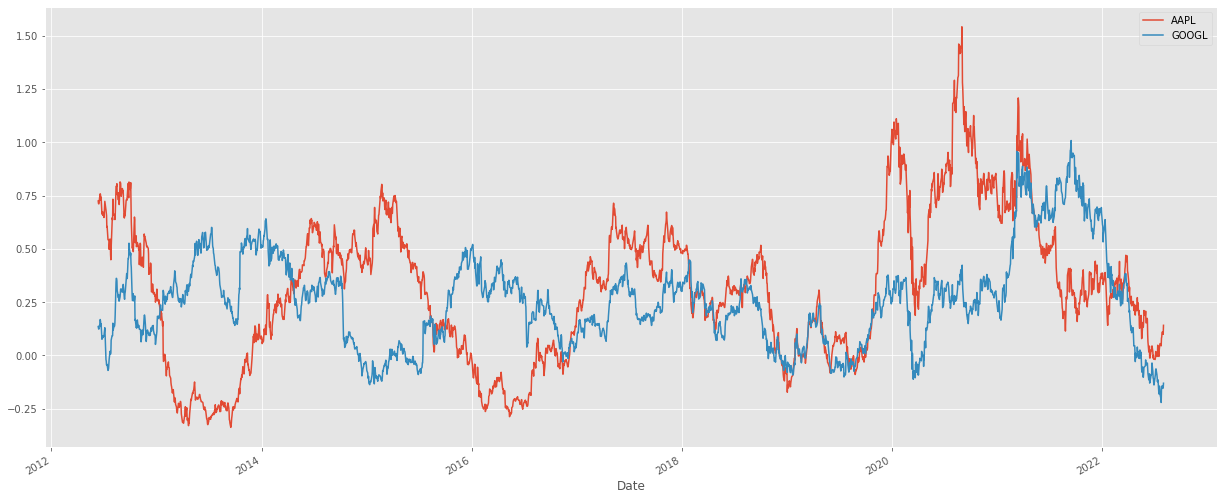

In [33]:
rolling_returns_360D[["AAPL", "GOOGL"]].plot(**plot_args);

2. **6M** Rolling Returns

In [34]:
rolling_returns_180D = daily_rets.rolling(window="180D", min_periods=120).apply(pms.multi_period_return)
rolling_returns_180D.dropna(subset=["AAPL"], inplace=True)
rolling_returns_180D.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-19,-0.343151,-0.458101,NaN,NaN,0.144204,NaN,-0.106740,NaN,0.061121,NaN,...,-0.079777,-0.242526,NaN,NaN,0.053441,-0.238627,NaN,-0.391925,NaN,NaN
2011-12-20,-0.316466,-0.435866,NaN,NaN,0.185337,NaN,-0.091310,NaN,0.071079,NaN,...,-0.054957,-0.213091,NaN,NaN,0.066792,-0.190742,NaN,-0.361999,NaN,NaN
2011-12-21,-0.320814,-0.437772,NaN,NaN,0.186834,NaN,-0.092780,NaN,0.082402,NaN,...,-0.056558,-0.209166,NaN,NaN,0.068803,-0.172706,NaN,-0.351192,NaN,NaN
2011-12-22,-0.311326,-0.433960,NaN,NaN,0.193121,NaN,-0.091800,NaN,0.086502,NaN,...,-0.051220,-0.196411,NaN,NaN,0.067889,-0.153392,NaN,-0.328748,NaN,NaN
2011-12-23,-0.301048,-0.437137,NaN,NaN,0.207430,NaN,-0.083472,NaN,0.093727,NaN,...,-0.049086,-0.186599,NaN,NaN,0.079594,-0.150679,NaN,-0.321267,NaN,NaN


3. Finally, **3M** Rolling Returns

In [47]:
rolling_returns_90D = daily_rets.rolling(window="90D", min_periods=60).apply(pms.multi_period_return)
rolling_returns_90D.dropna(subset=["AAPL"], inplace=True)
rolling_returns_90D.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2011-09-23,-0.373789,-0.359017,NaN,NaN,0.218940,NaN,-0.078302,NaN,-0.005797,NaN,...,-0.166248,-0.315318,NaN,NaN,-0.060386,-0.145730,NaN,-0.383982,NaN,NaN
2011-09-26,-0.359755,-0.334829,NaN,NaN,0.215534,NaN,-0.050231,NaN,-0.009894,NaN,...,-0.158509,-0.286388,NaN,NaN,-0.043289,-0.114924,NaN,-0.343274,NaN,NaN
2011-09-27,-0.336628,-0.332920,NaN,NaN,0.203745,NaN,-0.044129,NaN,-0.001115,NaN,...,-0.134489,-0.269995,NaN,NaN,-0.029465,-0.097686,NaN,-0.350751,NaN,NaN
2011-09-28,-0.380943,-0.366983,NaN,NaN,0.191150,NaN,-0.064853,NaN,-0.015455,NaN,...,-0.174345,-0.301937,NaN,NaN,-0.044007,-0.130063,NaN,-0.385264,NaN,NaN
2011-09-29,-0.374616,-0.378891,NaN,NaN,0.145916,NaN,-0.101794,NaN,-0.006341,NaN,...,-0.182216,-0.318706,NaN,NaN,-0.123079,-0.144876,NaN,-0.383292,NaN,NaN


All together (different window, same asset)

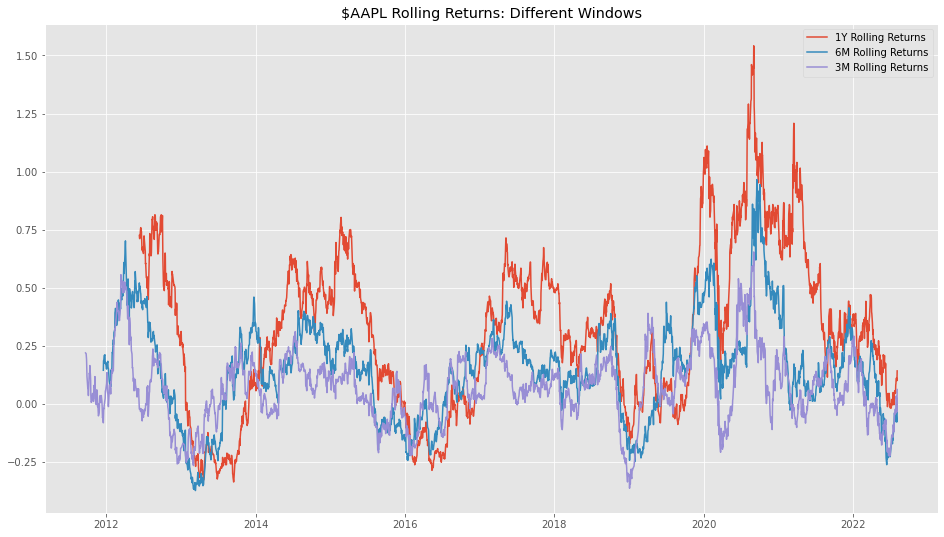

In [48]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

line360D, =ax.plot(rolling_returns_360D[["AAPL"]]);
line180D, =ax.plot(rolling_returns_180D[["AAPL"]]);
line90D, =ax.plot(rolling_returns_90D[["AAPL"]]);

line360D.set_label("1Y Rolling Returns")
line180D.set_label("6M Rolling Returns")
line90D.set_label("3M Rolling Returns")
ax.set_title("$AAPL Rolling Returns: Different Windows")
ax.legend();

#### Scoring with Rolling Returns and Heuristical Trading Rules

In [51]:
rolling_returns_360D.rank(axis=1).apply(pms.scorer, axis=1).head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-12,3.0,1.0,NaN,NaN,20.0,NaN,7.0,NaN,18.0,NaN,...,10.0,3.0,NaN,NaN,16.0,9.0,NaN,3.0,NaN,NaN
2012-06-13,4.0,1.0,NaN,NaN,20.0,NaN,8.0,NaN,18.0,NaN,...,11.0,4.0,NaN,NaN,17.0,10.0,NaN,3.0,NaN,NaN
2012-06-14,4.0,1.0,NaN,NaN,20.0,NaN,8.0,NaN,18.0,NaN,...,12.0,3.0,NaN,NaN,17.0,10.0,NaN,4.0,NaN,NaN
2012-06-15,4.0,1.0,NaN,NaN,20.0,NaN,8.0,NaN,18.0,NaN,...,11.0,4.0,NaN,NaN,17.0,11.0,NaN,4.0,NaN,NaN
2012-06-18,4.0,1.0,NaN,NaN,20.0,NaN,8.0,NaN,18.0,NaN,...,12.0,3.0,NaN,NaN,17.0,11.0,NaN,4.0,NaN,NaN


##### **Trading Rules**: _Daily_ Signaling

In [57]:
mk_daily_trading = (rolling_returns_360D.rank(axis=1).apply(pms.scorer, axis=1).shift(1)==20)
mk_daily_trading.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-06-13,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-06-14,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-06-15,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-06-18,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:xlabel='Date'>

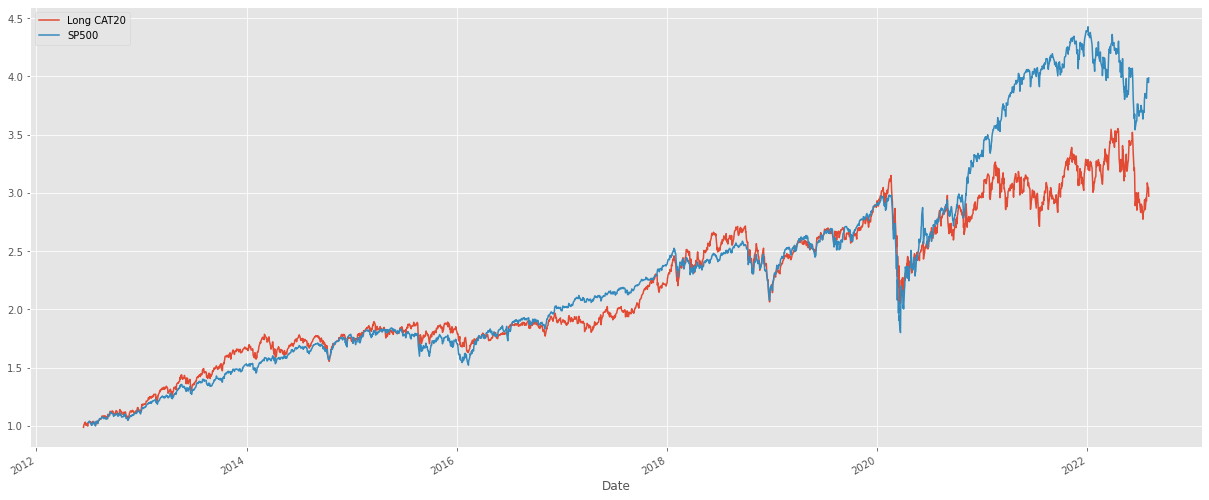

In [61]:
(1+daily_rets[mk_daily_trading].mean(axis=1, skipna=True)).rename("Long CAT20").cumprod().plot(**plot_args)
#NoMask (SP500 EW)
(1+daily_rets[START_TRAINING_DATE_CUT:].mean(axis=1, skipna=True)).rename("SP500").cumprod().plot(**plot_args)

In [159]:
# Faster Rolling Returns Signaling (Signaling Daily with 6M Rolling Return Predictor)
mk_daily_high_scored = (rolling_returns_180D.rank(axis=1).apply(pms.scorer, bins=10, axis=1).shift(1)==10)
mk_daily_low_scored = (rolling_returns_180D.rank(axis=1).apply(pms.scorer, bins=10, axis=1).shift(1)==1)

<AxesSubplot:xlabel='Date'>

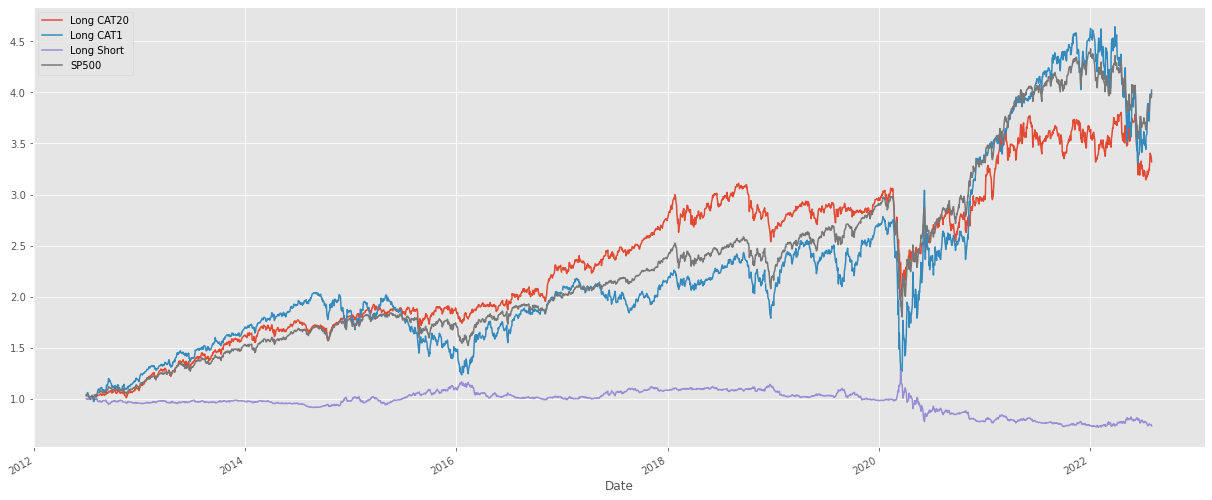

In [160]:
(1+daily_rets[mk_daily_high_scored].mean(axis=1, skipna=True))[START_TRAINING_DATE_CUT:].rename("Long CAT20").cumprod().plot(**plot_args)
(1+daily_rets[mk_daily_low_scored].mean(axis=1, skipna=True))[START_TRAINING_DATE_CUT:].rename("Long CAT1").cumprod().plot(**plot_args)

(1+0.5*daily_rets[mk_daily_high_scored].mean(axis=1, skipna=True)-\
    0.5*daily_rets[mk_daily_low_scored].mean(axis=1, skipna=True))[START_TRAINING_DATE_CUT:].rename("Long Short").cumprod().plot(**plot_args)

#NoMask (SP500 EW)
(1+daily_rets[START_TRAINING_DATE_CUT:].mean(axis=1, skipna=True)).rename("SP500").cumprod().plot(**plot_args)

**CONCLUSIONS**: Rolling Returns (daily calculated with several window of calculation) and daily signaling, non-conclusive for heuristical rules, but certainly is explaining full-sized Portfolio RSP (S&P500 Equally Weighted)

##### **Trading Rules**: _Monthly_ Rebalancing

In [123]:
"""
We dropout the first daily return (nan) and the bdates corresponding to
open month (August as of 20220830).
Monthly (cumulative) returns are needed in order to study the influence of frequence
of portfolio rebalance (assuming signaling driven by the daily rolling returns oo)
"""
monthly_returns = daily_rets.resample("BM").apply(pms.net_cumreturn, last_row=True)[1:-1]

1. _1Y-Rolling Returns_ (Sampled **Each Enf-Of-Month** -> Trading Rule to Implement the Next Month)

In [96]:
rolling_returns_360D.rank(axis=1).iloc[0].sort_values(ascending=False).head(25)

AAPL    359.0
ROST    358.0
SHW     357.0
TJX     356.0
WPI     355.0
ORLY    354.0
HD      353.0
GPS     352.0
ISRG    351.0
LEN     350.0
EFX     349.0
SBUX    348.0
V       347.0
DHI     346.0
MA      345.0
MO      344.0
VFC     343.0
AZO     342.0
SPG     341.0
EBAY    340.0
PM      339.0
WMT     338.0
SRE     337.0
NI      336.0
CINF    335.0
Name: 2012-06-12 00:00:00, dtype: float64

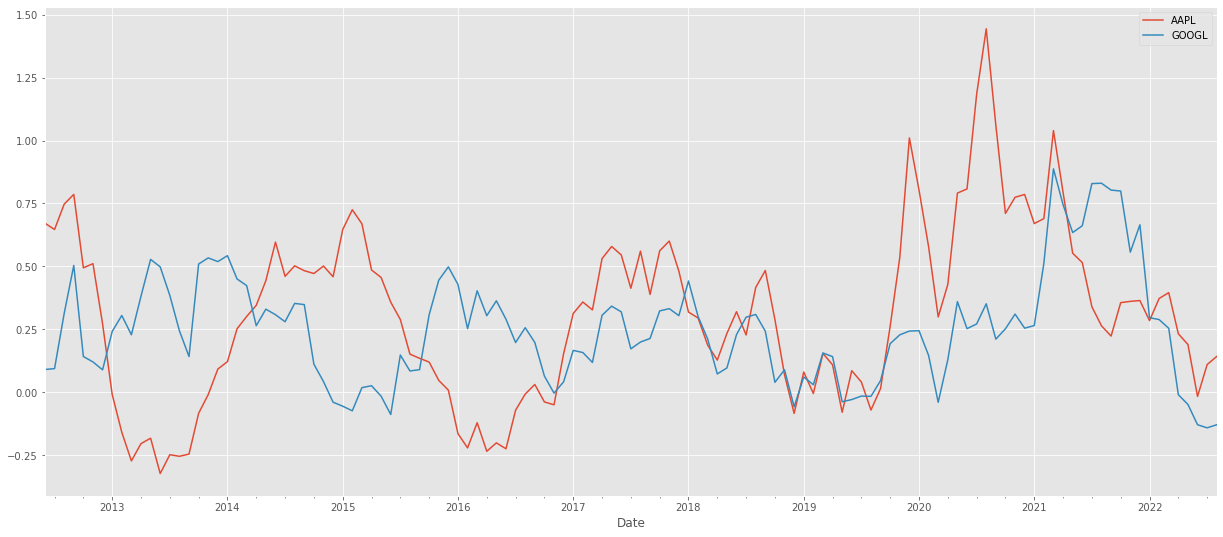

In [144]:
rolling_rets360_monthly = rolling_returns_360D.resample("BM").apply(lambda x: x[-1])
rolling_rets360_monthly[["AAPL", "GOOGL"]].plot(**plot_args);

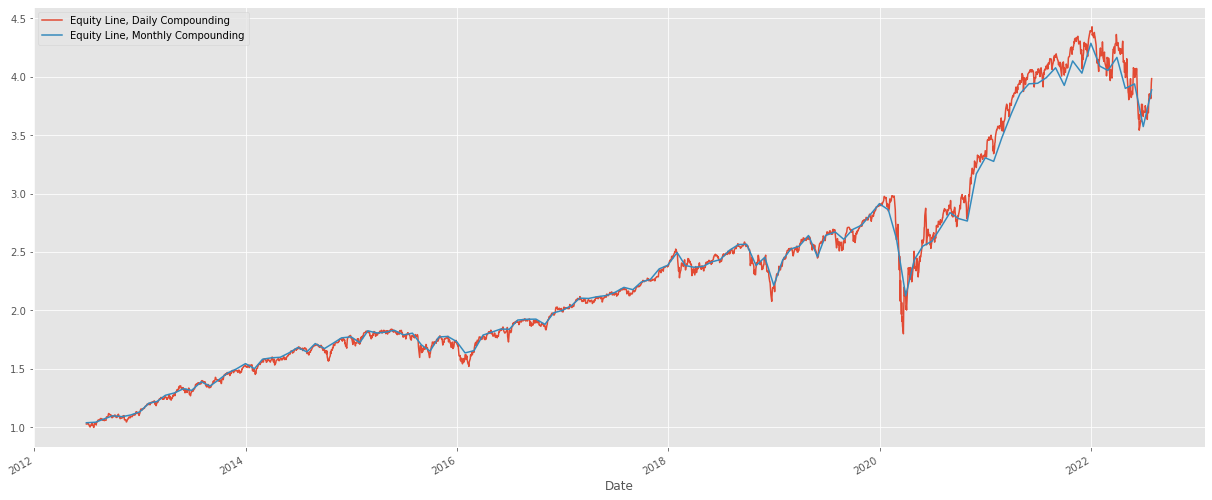

In [143]:
(1+daily_rets.mean(axis=1,skipna=True))[START_TRAINING_DATE_CUT:END_TRAINING_DATE_CUT].rename("Equity Line, Daily Compounding").cumprod().plot(**plot_args)
(1+monthly_returns.mean(axis=1,skipna=True))[START_TRAINING_DATE_CUT:END_TRAINING_DATE_CUT].rename("Equity Line, Monthly Compounding").cumprod().plot(**plot_args);

In [128]:
monthly_returns =  monthly_returns[START_TRAINING_DATE_CUT:]

In [126]:
rolling_rets360_monthly.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,-0.236682,-0.457478,NaN,NaN,0.671293,NaN,-0.050916,NaN,0.256336,NaN,...,-0.013503,-0.239021,NaN,NaN,0.159969,0.004799,NaN,-0.192329,NaN,NaN
2012-07-31,0.051608,-0.331690,NaN,NaN,0.646333,NaN,0.093075,NaN,0.377396,NaN,...,0.059414,-0.169658,NaN,NaN,0.303134,0.029673,NaN,-0.046417,NaN,NaN
2012-08-31,0.100907,-0.267005,NaN,NaN,0.746930,NaN,-0.000275,NaN,0.311020,NaN,...,0.094152,-0.024257,NaN,NaN,0.236489,0.134253,NaN,0.206475,NaN,NaN
2012-09-28,0.249259,-0.016113,NaN,NaN,0.785864,NaN,0.099497,NaN,0.392885,NaN,...,0.275856,0.070375,NaN,NaN,0.367529,0.323555,NaN,0.404653,NaN,NaN
2012-10-31,-0.017583,-0.209288,NaN,NaN,0.493793,NaN,0.019687,NaN,0.257740,NaN,...,0.035410,-0.212738,NaN,NaN,0.323130,0.262200,NaN,0.261803,NaN,NaN


In [280]:
mk_monthly_high_scored = (rolling_rets360_monthly.rank(axis=1).apply(pms.scorer, axis=1).shift(1)==20)
mk_monthly_low_scored = (rolling_rets360_monthly.rank(axis=1).apply(pms.scorer, axis=1).shift(1)==1)

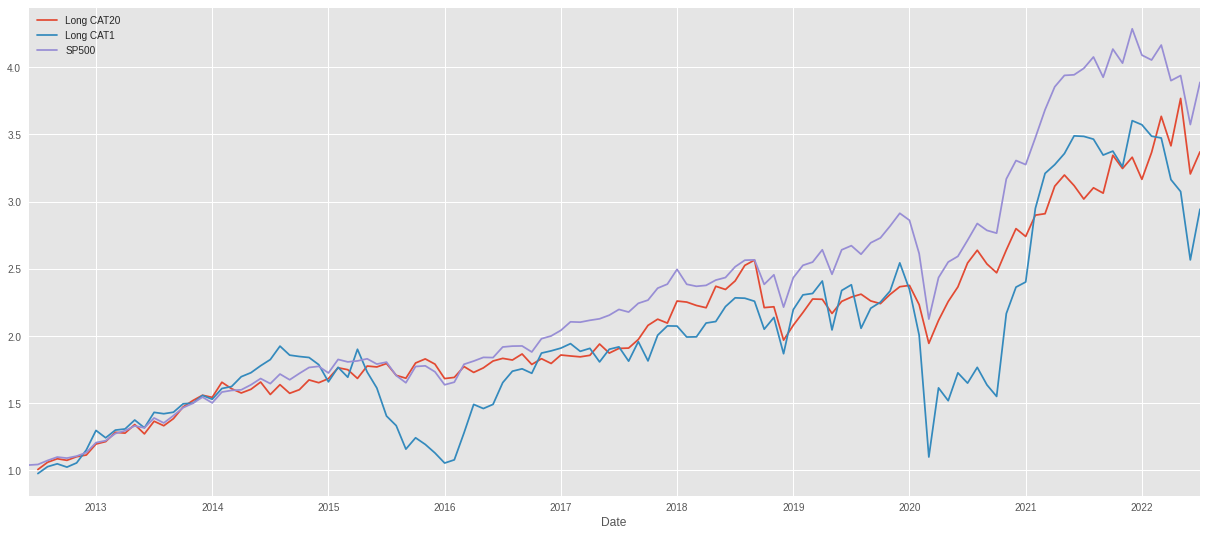

In [281]:
(1+monthly_returns[mk_monthly_high_scored].mean(axis=1,skipna=True)).rename("Long CAT20").cumprod().plot(**plot_args)
(1+monthly_returns[mk_monthly_low_scored].mean(axis=1,skipna=True)).rename("Long CAT1").cumprod().plot(**plot_args)
(1+monthly_returns.mean(axis=1,skipna=True)).rename("SP500").cumprod().plot(**plot_args);

2. _6M-Rolling Returns_

Resampling **predictor** to the end of each month

In [161]:
rolling_rets180_monthly = rolling_returns_180D.resample("BM").apply(lambda x: x[-1])

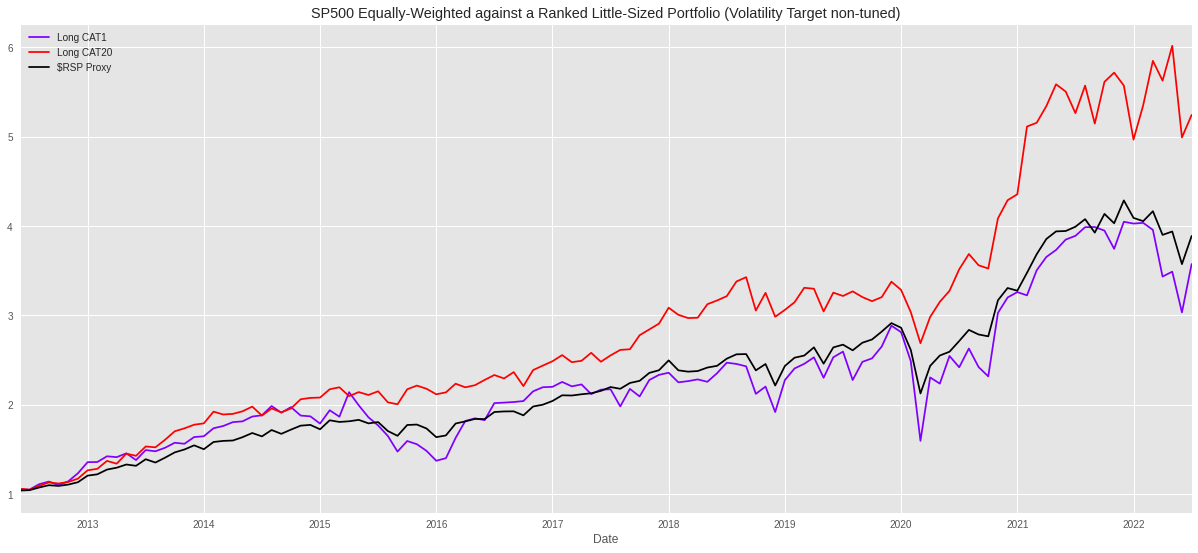

In [283]:
NCATS = 20

plt.style.use("ggplot")
colors = plt.cm.rainbow(np.linspace(0, 1, NCATS))

# Plotting Ventile-based Portfolios Against the Portfolio proxyfying the Index $RSP (in Black)
for bin in range(1,NCATS+1):    
    if bin==1 or bin==NCATS:
        mask180 = (rolling_rets180_monthly.rank(axis=1).apply(pms.scorer, bins=NCATS, axis=1).shift(1)==bin)
        (1+monthly_returns[mask180].mean(axis=1,skipna=True)).rename("Long CAT" +str(bin)).cumprod().plot(**plot_args, color=colors[bin-1])

(1+monthly_returns.mean(axis=1,skipna=True)).rename("$RSP Proxy").cumprod().plot(**plot_args, color="black")
plt.title("SP500 Equally-Weighted against a Ranked Little-Sized Portfolio (Volatility Target non-tuned)");

**OJO!!!!!** (Bingo!, Volatility can be fine-tuned with volatility scaled portfolios)

In [259]:
#Current running portfolio
rolling_rets180_monthly.columns[(rolling_rets180_monthly.rank(axis=1).apply(pms.scorer, bins=NCATS, axis=1).shift(1)==NCATS).iloc[-1]]

Index(['CDNS', 'CF', 'CTRA', 'CVX', 'DLTR', 'DVN', 'ENPH', 'JKHY', 'LLY',
       'MCK', 'MOS', 'MPC', 'MPWR', 'MRO', 'NLSN', 'NOC', 'NUE', 'OXY', 'PWR',
       'ROL', 'SEDG', 'TAP', 'TMUS', 'VLO', 'XOM'],
      dtype='object')

In [180]:
constituents = pd.read_pickle("data/config/IVV_historical_components_20220727.pkl")
constituents[["components"]].iloc[-1]

components    [(AAPL, APPLE INC), (MSFT, MICROSOFT CORP), (A...
Name: 2022-07-27 00:00:00, dtype: object

In [198]:
last_ivv_basket = pd.DataFrame(constituents.iloc[-1,0], columns=["ticker","shortName"])
last_ivv_basket

,ticker,shortName
0,AAPL,APPLE INC
1,MSFT,MICROSOFT CORP
2,AMZN,AMAZON COM INC
3,TSLA,TESLA INC
4,GOOGL,ALPHABET INC CLASS A
...,...,...
502,FOX,FOX CORP CLASS B
503,PVH,PVH CORP
504,UBFUT,CASH COLLATERAL USD UBFUT
505,NWS,NEWS CORP CLASS B


In [260]:
heuristic_stocks_picked = rolling_rets180_monthly.columns[(rolling_rets180_monthly.rank(axis=1).apply(pms.scorer, bins=NCATS, axis=1).shift(1)==NCATS).iloc[-1]].tolist()
print(len(heuristic_stocks_picked))

25


In [261]:
port = pd.DataFrame({"symbols": heuristic_stocks_picked})

In [262]:
equity_screener_2022aug_port50 = port.merge(last_ivv_basket, left_on="symbols", right_on="ticker", how="inner")[["symbols","shortName"]]
equity_screener_2022aug_port50

,symbols,shortName
0,CDNS,CADENCE DESIGN SYSTEMS INC
1,CF,CF INDUSTRIES HOLDINGS INC
2,CTRA,COTERRA ENERGY INC
3,CVX,CHEVRON CORP
4,DLTR,DOLLAR TREE INC
5,DVN,DEVON ENERGY CORP
6,ENPH,ENPHASE ENERGY INC
7,JKHY,JACK HENRY AND ASSOCIATES INC
8,LLY,ELI LILLY
9,MCK,MCKESSON CORP


3. _3M-Rolling Returns_

Resampling **predictor** to the end of each month


<AxesSubplot:xlabel='Date'>

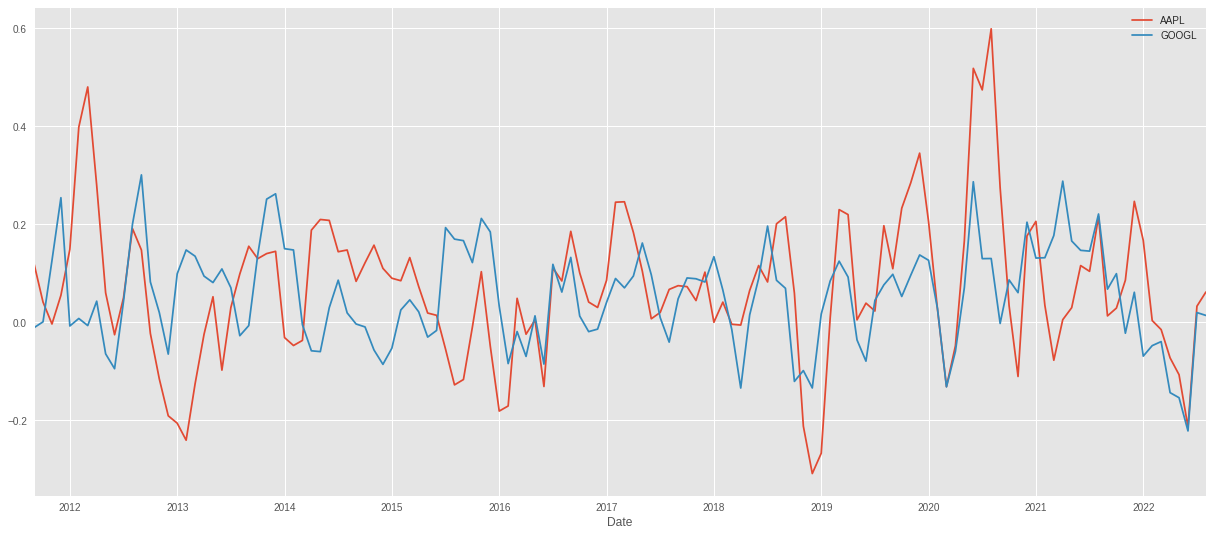

In [263]:
rolling_rets90_monthly = rolling_returns_90D.resample("BM").apply(lambda x: x[-1])
rolling_rets90_monthly[["AAPL","GOOGL"]].plot(**plot_args)

In [272]:
rolling_rets90_monthly = rolling_rets90_monthly[START_TRAINING_DATE_CUT:END_TRAINING_DATE_CUT]

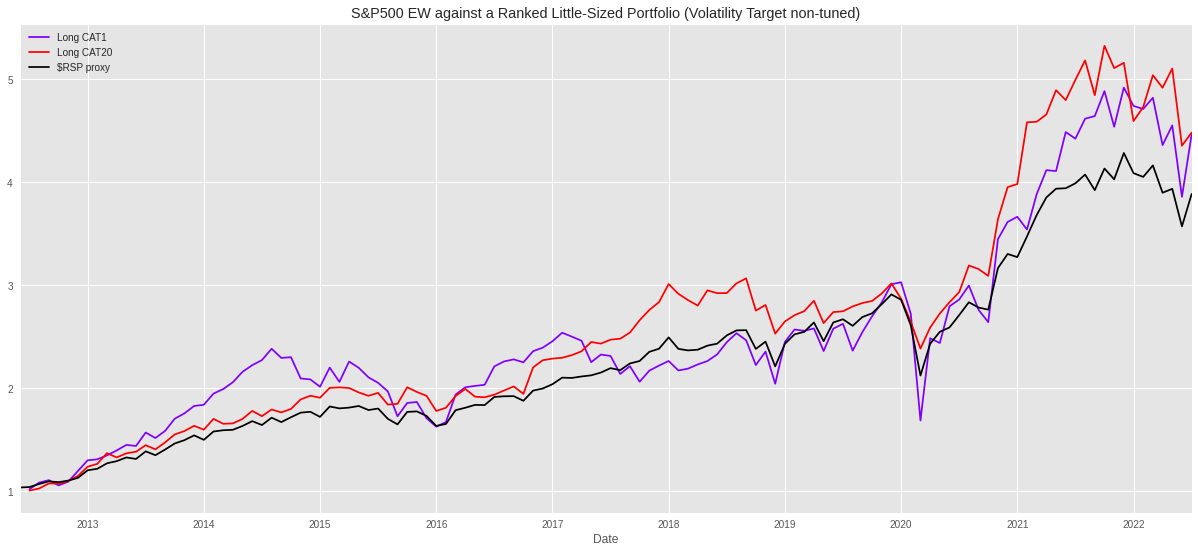

In [282]:
NCATS = 20 #Ventile-Based Portfolios

plt.style.use("ggplot")
colors = plt.cm.rainbow(np.linspace(0, 1, NCATS))

for bin in range(1,NCATS+1):    
    if bin==1 or bin==NCATS:
        mask90 = (rolling_rets90_monthly.rank(axis=1).apply(pms.scorer, bins=NCATS, axis=1).shift(1)==bin)
        (1+monthly_returns[mask90].mean(axis=1,skipna=True)).rename("Long CAT"+str(bin)).cumprod().plot(**plot_args, color=colors[bin-1])

(1+monthly_returns.mean(axis=1,skipna=True)).rename("$RSP proxy").cumprod().plot(**plot_args, color="black")
plt.title("S&P500 EW against a Ranked Little-Sized Portfolio (Volatility Target non-tuned)");

### **First Conclusions:**

1. Clearly portfolios constructed from ranked stocks could outperform the proxy portofolio build from S&P500 components.

2. _Rolling Returns 90D, 180D **sampled monthly**_ are good candidates for predictors (features). It is less clear for _360D_ (1Y) _Rolling Returns_ even though it is interesting to include as a feature as well.

3. **Daily Rebalancing** have to be avoided because of operational problems and transactional costs. On the other hand, portfolio selection/construction based on rankers provide less conclusive impact on wealth at the end of the data period which will be used for training machine learning models.

4. Cumulative Returns are sensible to portfolio sizes. We start the modelling by fixing signaling (trading rules provided by the LTR models) to construct ventile-sized portfolios

5. Some kind of correlation analysis between features can be instructive (dimensionality reduction)

#### Exports for Later Use

Let us export features sampled monthly for later use. A systematic approach to slicing (a python script with the constant dates defining the maximum sample considered is on the way)

In [291]:
print(rolling_rets90_monthly.shape)
print(rolling_rets180_monthly.shape)
print(rolling_rets360_monthly.shape)

(122, 755)
(122, 755)
(122, 755)


In [288]:
rolling_rets360_monthly= rolling_rets360_monthly[:-1]
rolling_rets360_monthly.tail()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,0.021874,NaN,-0.246801,0.135623,0.395137,0.598494,0.341216,0.030295,0.002248,NaN,...,-0.229310,NaN,-0.190811,NaN,0.094504,-0.182889,-0.160511,0.183563,NaN,0.197145
2022-04-29,-0.083873,NaN,-0.123716,-0.000992,0.231657,0.344764,0.219440,-0.060393,-0.019628,NaN,...,-0.415336,NaN,-0.296206,NaN,-0.003489,-0.275840,-0.214526,0.008608,NaN,0.025972
2022-05-31,-0.073033,NaN,-0.264609,0.006258,0.189057,0.367743,0.342068,-0.089151,0.091164,NaN,...,-0.398324,NaN,-0.285461,NaN,0.035406,-0.219708,-0.345316,0.005884,NaN,-0.018685
2022-06-30,-0.198619,NaN,-0.409683,-0.159058,-0.017569,0.399770,0.229823,-0.219261,-0.061342,NaN,...,-0.435227,NaN,-0.348386,NaN,-0.012518,-0.333147,-0.455588,-0.020317,NaN,-0.102792
2022-07-29,-0.123272,NaN,-0.312782,-0.092941,0.109110,0.285065,0.195805,-0.102628,-0.094563,NaN,...,-0.446587,NaN,-0.272497,NaN,-0.065558,-0.254597,-0.345777,0.060287,NaN,-0.099860


In [289]:
print(rolling_rets180_monthly.index[0])
print(rolling_rets180_monthly.index[-1])

2011-12-30 00:00:00
2022-08-31 00:00:00


In [290]:
rolling_rets180_monthly = rolling_rets180_monthly[START_TRAINING_DATE_CUT:END_TRAINING_DATE_CUT]

In [294]:
rolling_returns_360D

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-12,-0.218048,-0.455348,NaN,NaN,0.724823,NaN,-0.087378,NaN,0.230572,NaN,...,-0.001067,-0.249454,NaN,NaN,0.171766,-0.032085,NaN,-0.248163,NaN,NaN
2012-06-13,-0.227359,-0.457905,NaN,NaN,0.712849,NaN,-0.100944,NaN,0.221634,NaN,...,-0.006153,-0.243505,NaN,NaN,0.159956,-0.040248,NaN,-0.254820,NaN,NaN
2012-06-14,-0.220425,-0.447037,NaN,NaN,0.710963,NaN,-0.088365,NaN,0.234146,NaN,...,0.002948,-0.244496,NaN,NaN,0.188743,-0.029524,NaN,-0.236097,NaN,NaN
2012-06-15,-0.207349,-0.436170,NaN,NaN,0.718746,NaN,-0.080225,NaN,0.241296,NaN,...,0.010978,-0.227641,NaN,NaN,0.199261,0.011613,NaN,-0.221951,NaN,NaN
2012-06-18,-0.204576,-0.444480,NaN,NaN,0.753622,NaN,-0.067399,NaN,0.245268,NaN,...,0.017134,-0.235573,NaN,NaN,0.214208,0.004410,NaN,-0.216126,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,-0.138396,NaN,-0.314058,-0.093757,0.087472,0.350233,0.202380,-0.110123,-0.072807,NaN,...,-0.455104,NaN,-0.275737,NaN,-0.056982,-0.294640,-0.374739,0.061838,NaN,-0.092391
2022-07-29,-0.123272,NaN,-0.312782,-0.092941,0.109110,0.285065,0.195805,-0.102628,-0.094563,NaN,...,-0.446587,NaN,-0.272497,NaN,-0.065558,-0.254597,-0.345777,0.060287,NaN,-0.099860
2022-08-01,-0.137961,NaN,-0.320647,-0.038635,0.109824,0.275352,0.226235,-0.156066,-0.089279,NaN,...,-0.403218,NaN,-0.283928,NaN,-0.068293,-0.235422,-0.362530,0.005346,NaN,-0.103970


In [298]:
import pickle

rolling_rets = {"daily": (rolling_returns_90D, rolling_returns_180D, rolling_returns_360D),
                "monthly": (rolling_rets90_monthly, rolling_rets180_monthly, rolling_rets360_monthly)}

#Pickle serialization
with open("data/config/20220831_rolling_rets_data.pkl","wb") as file:
    pickle.dump(rolling_rets,file, protocol=pickle.HIGHEST_PROTOCOL)

In [299]:
rolling_rets.keys()

dict_keys(['daily', 'monthly'])

In [305]:
rolling_rets["monthly"][2]

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-29,-0.236682,-0.457478,NaN,NaN,0.671293,NaN,-0.050916,NaN,0.256336,NaN,...,-0.013503,-0.239021,NaN,NaN,0.159969,0.004799,NaN,-0.192329,NaN,NaN
2012-07-31,0.051608,-0.331690,NaN,NaN,0.646333,NaN,0.093075,NaN,0.377396,NaN,...,0.059414,-0.169658,NaN,NaN,0.303134,0.029673,NaN,-0.046417,NaN,NaN
2012-08-31,0.100907,-0.267005,NaN,NaN,0.746930,NaN,-0.000275,NaN,0.311020,NaN,...,0.094152,-0.024257,NaN,NaN,0.236489,0.134253,NaN,0.206475,NaN,NaN
2012-09-28,0.249259,-0.016113,NaN,NaN,0.785864,NaN,0.099497,NaN,0.392885,NaN,...,0.275856,0.070375,NaN,NaN,0.367529,0.323555,NaN,0.404653,NaN,NaN
2012-10-31,-0.017583,-0.209288,NaN,NaN,0.493793,NaN,0.019687,NaN,0.257740,NaN,...,0.035410,-0.212738,NaN,NaN,0.323130,0.262200,NaN,0.261803,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0.021874,NaN,-0.246801,0.135623,0.395137,0.598494,0.341216,0.030295,0.002248,NaN,...,-0.229310,NaN,-0.190811,NaN,0.094504,-0.182889,-0.160511,0.183563,NaN,0.197145
2022-04-29,-0.083873,NaN,-0.123716,-0.000992,0.231657,0.344764,0.219440,-0.060393,-0.019628,NaN,...,-0.415336,NaN,-0.296206,NaN,-0.003489,-0.275840,-0.214526,0.008608,NaN,0.025972
2022-05-31,-0.073033,NaN,-0.264609,0.006258,0.189057,0.367743,0.342068,-0.089151,0.091164,NaN,...,-0.398324,NaN,-0.285461,NaN,0.035406,-0.219708,-0.345316,0.005884,NaN,-0.018685
